<a href="https://colab.research.google.com/github/NattachaiWat/ml442/blob/master/Lab5_Servering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

TensorFlow 2.x selected.


In [0]:
from google.colab import files
print('Upload the model (flower_model.tar.gz) from Lab3')
model_gz = files.upload()

Upload the model (flower_model.tar.gz) from Lab3


Saving flower_model.tar.gz to flower_model.tar.gz


In [0]:
model_filename = list(model_gz.keys())[0]
!tar -xzf {model_filename} 

In [0]:
!saved_model_cli show --dir ./tmp/for_server/1   --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['keras_layer_1_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 224, 224, 3)
        name: serving_default_keras_layer_1_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 5)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict


In [0]:
# This is the same as you would do from your command line, but without the [arch=amd64], and no sudo
# You would instead do:
# echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0   8732      0 --:--:-- --:--:-- --:--:--  8707
OK
Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:4 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:9 htt

In [0]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 76 not upgraded.
Need to get 151 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 1.14.0 [151 MB]
Fetched 151 MB in 2s (60.5 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_1.14.0_all.deb ...
Unpacking tensorflow-model-server (1.14.0) ...
Setting up tensorflow-model-server (1.14.0) ...


In [0]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=flower \
  --model_base_path="/content/tmp/for_server" >server2.log 2>&1

Starting job # 0 in a separate thread.


In [0]:
!tail server2.log


2019-09-14 08:14:22.967838: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2019-09-14 08:14:23.016157: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:202] Restoring SavedModel bundle.
2019-09-14 08:14:23.300183: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:151] Running initialization op on SavedModel bundle at path: /content/tmp/for_server/1
2019-09-14 08:14:23.388122: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:311] SavedModel load for tags { serve }; Status: success. Took 452374 microseconds.
2019-09-14 08:14:23.388226: I tensorflow_serving/servables/tensorflow/saved_model_warmup.cc:103] No warmup data file found at /content/tmp/for_server/1/assets.extra/tf_serving_warmup_requests
2019-09-14 08:14:23.388340: I tensorflow_serving/core/loader_harness.cc:86] Successfully loaded servable version {name: flower 

Saving daisy.jpg to daisy.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


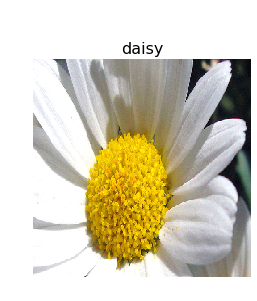

In [0]:
import json
import numpy as np
import requests
from google.colab import files
from tensorflow.keras.preprocessing import image
import time

def show(img ,title):
  plt.figure()
  plt.imshow(img)
  plt.axis('off')
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})

uploaded = files.upload()
class_name=['daisy','dandelion','roses','sunflowers','tulips']

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  images = images/225.0
  data = json.dumps({"signature_name": "serving_default", "instances": images[:].tolist()})
  headers = {"content-type": "application/json"}
  #time.sleep(2)
  json_response = requests.post('http://localhost:8501/v1/models/flower:predict', data=data, headers=headers)
  predictions = json.loads(json_response.text)['predictions']
  show(np.reshape(images,(224,224,3)),class_name[np.argmax(predictions,axis=1)[0]])


